# What is IForest behavior according to the dataset dimension size?

## Test with 2 dimension dataset

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
perf = performances.performances()
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6
min_sample_size = 5
sample_size_step = 5

x_lim = 40
y_lim = 30

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_brut, y_transform, full_dataset = dts.TwoD_V5_1_0()
#X_brut.describe()

Columns number = 3


In [4]:
dts.description

"Jeu de données à 2 dimensions constitué de données normales et 1% de données anormales. Les données anormales se retrouvent au centre d'un grand cercle formé par les données normales. Ici, les données anormales sont plus éloignées des données normales mais et se ressemblent beaucoup. \n Données normales : Données aléatoire uniforme, X1 entre -5 et 5, X2 entre -7 et 7, size = 1500, distance euclidienne entre 5 et 7 (Grand cercle de rayon 7 et petit cercle de rayon 5) \n Données anormales : Données aléatoire gaussienne, mu = 0, sigma = 0.5, size = 15."

In [5]:
#full_dataset.info()

In [6]:
#X_brut.info()

In [7]:
#y_transform.describe()

In [8]:
#y_transform

## Execution of IForest to see the variance of the result

In [9]:
roc_aucs = []
specificities = []
fars = []
for i in range(5):
    print("---------------------------------N°"+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform, IFD_scores)
    
    # False Alarm Rate
    fars.append(far)
    #ROC AUC
    roc_aucs.append(auc)
    # Specificity
    specificities.append(spec)

print("Variance ROC AUC = "+str(np.var(roc_aucs)))
print("Variance Specificity = "+str(np.var(specificities)))
print("Variance Falses alert rate = "+ str(np.var(fars)))
min_far = min(fars)
print("min false alert rate = "+str(min_far))
max_specificity = max(specificities)
print("max specificity = "+str(max_specificity))
max_roc_auc = max(roc_aucs)
print("max ROC AUC = "+str(max_roc_auc))

---------------------------------N°0----------------------------------------------------
Confusion matrice
[[  15    0]
 [  61 1439]]
****************************************************************
ROC AUC
0.9796666666666667
****************************************************************
Specificity
1.0
****************************************************************
Precision
1.0
****************************************************************
Recall
0.9593333333333334
****************************************************************
f1_score
0.9792446410343655
****************************************************************
False alarm rate (%)
4.066666666666663
****************************************************************
---------------------------------N°1----------------------------------------------------
Confusion matrice
[[  15    0]
 [  59 1441]]
****************************************************************
ROC AUC
0.9803333333333333
***********************************

## Execution of IForest to see the map of the result

Confusion matrice
[[  15    0]
 [  69 1431]]
****************************************************************
ROC AUC
0.977
****************************************************************
Specificity
1.0
****************************************************************
Precision
1.0
****************************************************************
Recall
0.954
****************************************************************
f1_score
0.9764585465711361
****************************************************************
False alarm rate (%)
4.600000000000004
****************************************************************
Columns number = 4
Columns number = 4


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


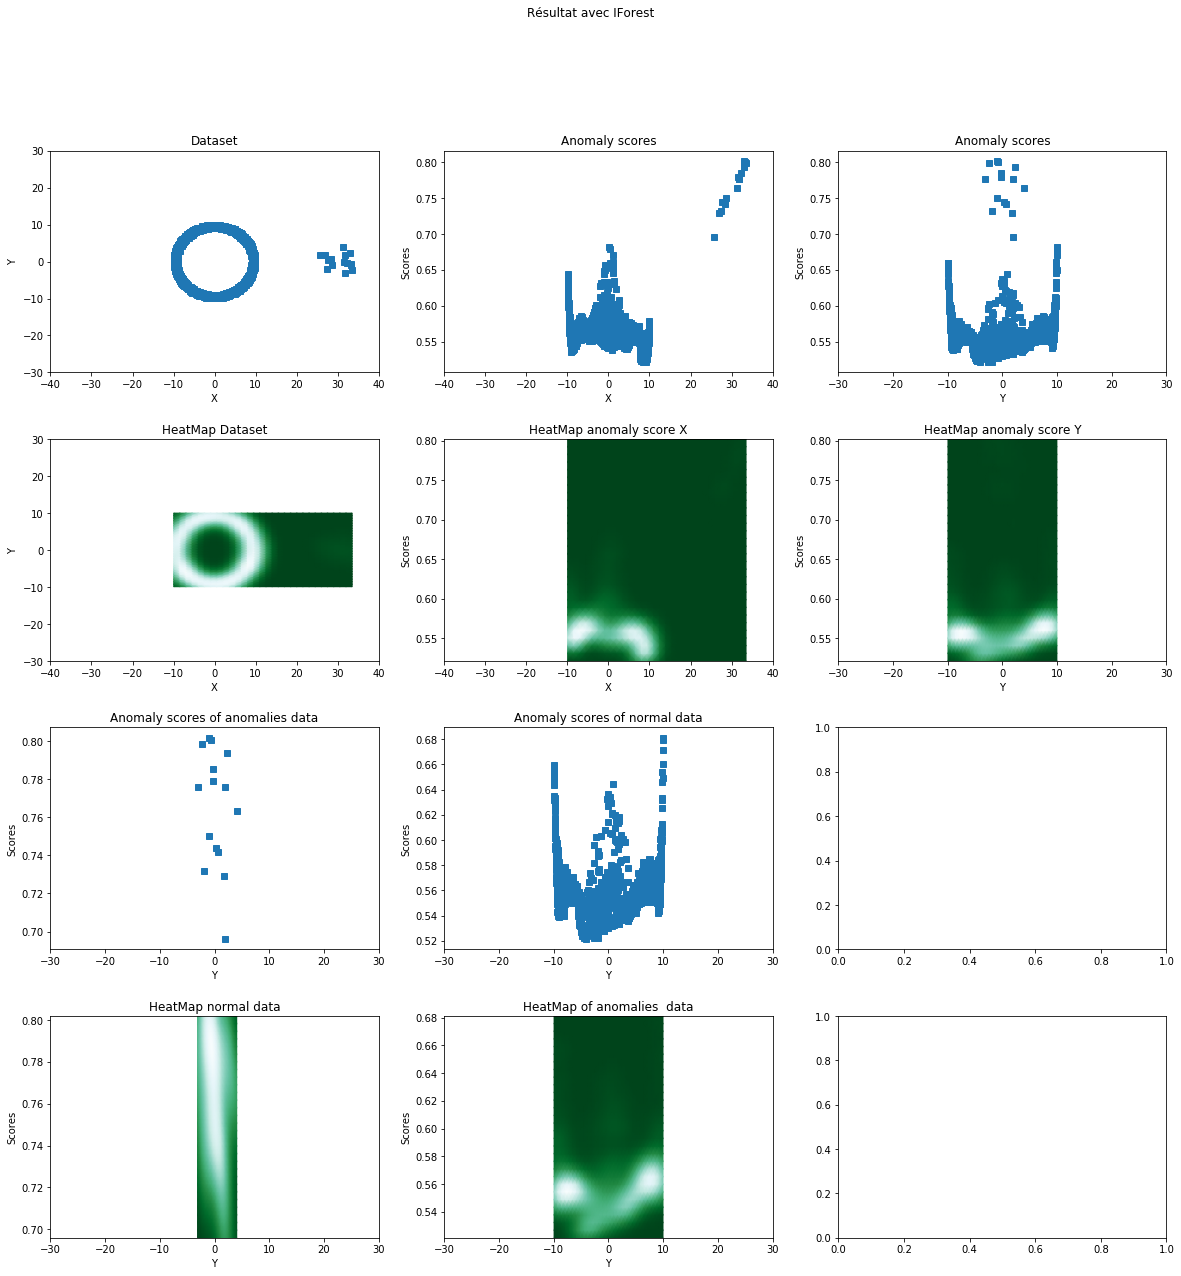

In [10]:
func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
func_IFD.fit(X_brut)
IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform, IFD_scores)

fig, axs, normal, abnormal, all_dataset_with_scores = visu.result_description_2D(title='Résultat avec IForest', 
                                      scores=IFD_scores, X_brut=X_brut, y_brut = y_transform, 
                                      x_lim=x_lim, y_lim=y_lim, outlier_label=-1)
fig.show()

## Execution of IForest to see the best threshold

In [11]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("---------------------------------Threshold = "+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=i)

    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(IFD_y_pred_IF, y_transform, IFD_scores)
    

---------------------------------Threshold = 0.1----------------------------------------------------
Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.2----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.30000000000000004----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.4----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.5----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.6----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [  56 1444]]
****************************************************************
ROC AUC
0.9813333333333334
****************************************************************
Specificity
1.0
****************************************************************
Precision
1.0
****************************************************************
Recall
0.9626666666666667
****************************************************************
f1_score
0.9809782608695652
****************************************************************
False alarm rate (%)
3.733333333333333
****************************************************************
---------------------------------Threshold = 0.7000000000000001----------------------------------------------------
Confusion matrice
[[  14    1]
 [   0 1500]]
****************************************************************
ROC AUC
0.9666666666666667
****************************************************************
Specificity
0.9333333333333333
*

## Execution Of EIF on dataset

In [12]:
import eif
X_brut_numpy = X_brut.to_numpy()

Confusion matrice
[[  15    0]
 [   0 1500]]
****************************************************************
ROC AUC
1.0
****************************************************************
Specificity
1.0
****************************************************************
Precision
1.0
****************************************************************
Recall
1.0
****************************************************************
f1_score
1.0
****************************************************************
False alarm rate (%)
0.0
****************************************************************
Columns number = 4
Columns number = 4


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


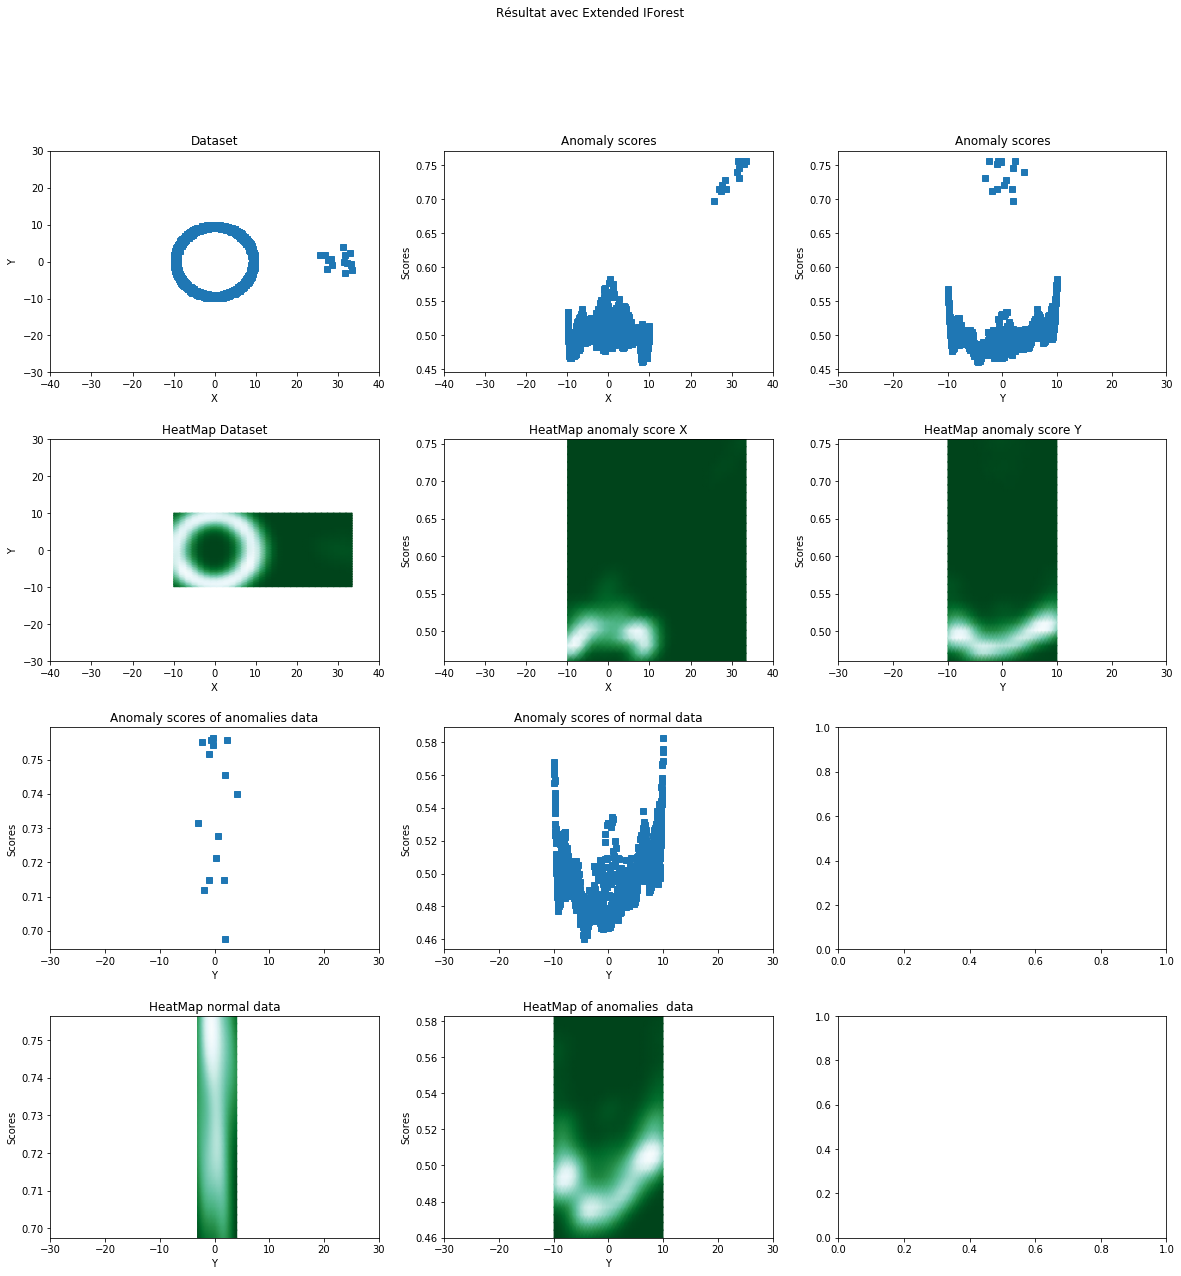

In [13]:
F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
S1 = F1.compute_paths(X_in=X_brut_numpy)
P1 = np.where(S1>=threshold,-1,1)

ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(P1, y_transform, S1)

fig, axs, normal, abnormal, all_dataset_with_scores = visu.result_description_2D(title='Résultat avec Extended IForest', 
                                      scores=S1, X_brut=X_brut, y_brut = y_transform, 
                                      x_lim=x_lim, y_lim=y_lim, outlier_label=-1)
fig.show()

In [14]:
# Varier le seuil de décision pour voir l'impact
for i in np.arange(0.1, 1., 0.1):
    print("---------------------------------Threshold = "+str(i)+"----------------------------------------------------")
    # Instanciation, fit and predict
    F1  = eif.iForest(X_brut_numpy, ntrees=n_trees, sample_size=max_samples, ExtensionLevel=0)
    S1 = F1.compute_paths(X_in=X_brut_numpy)
    P1 = np.where(S1>=i,-1,1)
    ttn, tfp, tfn, ttp, cm, auc, spec, prec, rec, f1, far  = perf.performance_summary(P1, y_transform, S1)

---------------------------------Threshold = 0.1----------------------------------------------------
Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.2----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.30000000000000004----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.4----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[  15    0]
 [1500    0]]
****************************************************************
ROC AUC
0.5
****************************************************************
Specificity
1.0
****************************************************************
Precision
0.0
****************************************************************
Recall
0.0
****************************************************************
f1_score
0.0
****************************************************************
False alarm rate (%)
100.0
****************************************************************
---------------------------------Threshold = 0.5----------------------------------------------------


/Users/maurrastogbe/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrice
[[ 15   0]
 [583 917]]
****************************************************************
ROC AUC
0.8056666666666666
****************************************************************
Specificity
1.0
****************************************************************
Precision
1.0
****************************************************************
Recall
0.6113333333333333
****************************************************************
f1_score
0.7587918907736864
****************************************************************
False alarm rate (%)
38.866666666666674
****************************************************************
---------------------------------Threshold = 0.6----------------------------------------------------
Confusion matrice
[[  15    0]
 [   0 1500]]
****************************************************************
ROC AUC
1.0
****************************************************************
Specificity
1.0
*************************************************

EIF ne détecte pas les anomalies. En fait, EIF considère toutes les données comme étant normales

## Conclusion

IForest ne détecte pas les anomalies et fais de fausses alertes.